In [33]:
import gffutils
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
from matplotlib.ticker import FixedLocator, ScalarFormatter


In [ ]:
# Path to your summary file
summary_path = "/Users/ycheng/Desktop/IsoDecipher/results/panel_features_summary.csv"
panel_path   = "/Users/ycheng/Desktop/IsoDecipher/results/panel_features.csv"

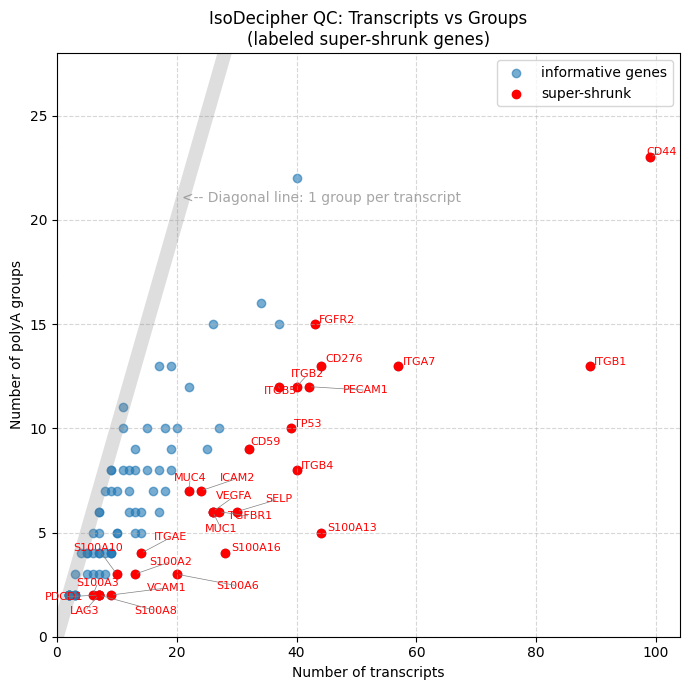

In [75]:


# Load summary
df = pd.read_csv(summary_path)
informative = df[df["status"] == "informative"].copy()


informative["shrink_ratio"] = informative["num_groups"] / informative["num_transcripts"]

# Threshold: flag genes where ratio < 0.3 (tweak if needed)
shrunken = informative[informative["shrink_ratio"] < 0.35]
plt.figure(figsize=(7,7))
plt.scatter(informative["num_transcripts"], informative["num_groups"], alpha=0.6, label="informative genes")
plt.scatter(shrunken["num_transcripts"], shrunken["num_groups"], color="red", label="super-shrunk")

# Label the shrunk genes
texts = [plt.text(row["num_transcripts"], row["num_groups"], row["gene"],
                  fontsize=8, color="red") for _, row in shrunken.iterrows()]
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", color="gray", lw=0.5),
    force_points=0.2,   # reduce pushing
    force_text=2,     # reduce text repulsion
    # expand_points=(1.05, 1.1),
    # expand_text=(1.05, 1.1),
    # lim=500             # higher limit helps convergence
)

plt.xlabel("Number of transcripts")
plt.ylabel("Number of polyA groups")
plt.title("IsoDecipher QC: Transcripts vs Groups\n(labeled super-shrunk genes)")

max_val = informative["num_transcripts"].max()+5
plt.xlim(0 , max_val)
plt.ylim(0, informative["num_groups"].max()+5)
xlim, ylim = plt.xlim(), plt.ylim()
diag_min, diag_max = max(xlim[0], ylim[0]), min(xlim[1], ylim[1])
plt.plot([diag_min, diag_max], [diag_min, diag_max], color="gray", linestyle="-", lw=10, alpha=0.26)

plt.text(
    max_val * 0.2,  # x position
    informative["num_groups"].max()*0.9 ,  # y position
    "<-- Diagonal line: 1 group per transcript",
    color="gray",
    fontsize=10,
    ha="left", va="bottom", alpha=0.7
)

# Custom tick position
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("/Users/ycheng/Desktop/IsoDecipher/docs/example_qc.png", dpi=300,
            bbox_inches="tight", transparent=True)


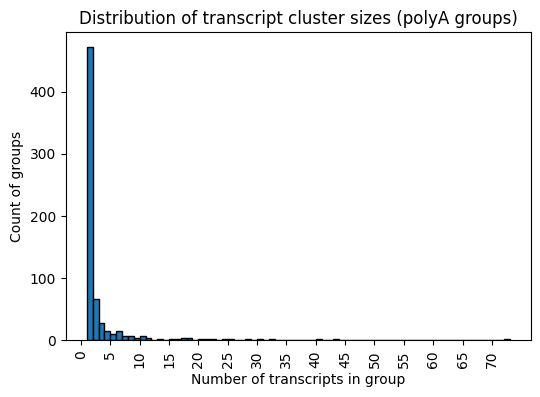

In [18]:
# 2. Histogram: group size distribution
panel = pd.read_csv(panel_path)
# Count transcripts per polyA group
group_sizes = (
    panel[panel["feature_type"] == "polyA_window"]["transcripts"]
    .str.split(";")
    .apply(len)
)

plt.figure(figsize=(6,4))
plt.hist(group_sizes, bins=range(1, group_sizes.max()+2), edgecolor="black")
plt.xlabel("Number of transcripts in group")
plt.ylabel("Count of groups")
plt.title("Distribution of transcript cluster sizes (polyA groups)")
plt.xticks(np.arange(0, max(group_sizes)+1, 5))
plt.xticks(rotation=90)
plt.show()